In [1]:
from sklearn.datasets import make_classification 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibrationDisplay, calibration_curve
from sklearn.calibration import CalibratedClassifierCV
import pandas as pd 
import numpy as np 

In [2]:
X, y = make_classification(n_samples = 100000, random_state = 2021)

In [3]:
X.shape, y.shape

((100000, 20), (100000,))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [5]:
X_valid, X_test2, y_valid, y_test2 = train_test_split(X_test, y_test)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((75000, 20), (25000, 20), (75000,), (25000,))

In [7]:
X_valid.shape, X_test2.shape, y_valid.shape, y_test2.shape

((18750, 20), (6250, 20), (18750,), (6250,))

In [8]:
X_train.shape, X_valid.shape, X_test2.shape

((75000, 20), (18750, 20), (6250, 20))

In [9]:
y_test

array([0, 0, 1, ..., 0, 1, 1])

#### UNCALIBRATED LOGISTIC REGRESSION PLOTS ON DIFFERENT VALIDATION / TEST DATA.

In [10]:
logreg = LogisticRegression(random_state = 2021)

In [11]:
logreg.fit(X_train, y_train)

LogisticRegression(random_state=2021)

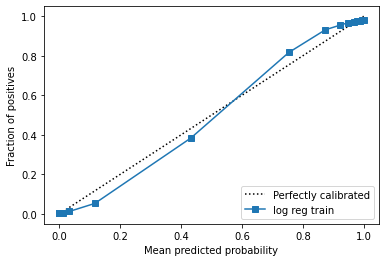

In [15]:
CalibrationDisplay.from_estimator(logreg, X_train, y_train, n_bins = 20, strategy = "quantile", name = "log reg train")

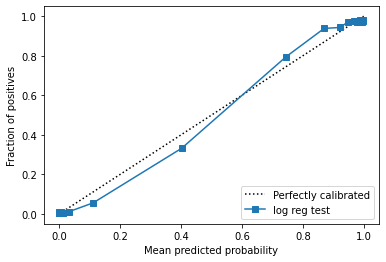

In [16]:
CalibrationDisplay.from_estimator(logreg, X_test, y_test, n_bins = 20, strategy = "quantile", name = "log reg test")

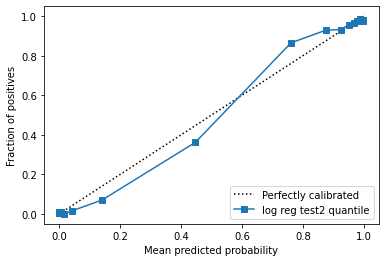

In [17]:
CalibrationDisplay.from_estimator(logreg, X_test2, y_test2, n_bins = 20, strategy = "quantile", name = "log reg test2 quantile")

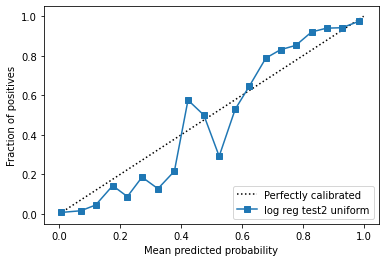

In [18]:
CalibrationDisplay.from_estimator(logreg, X_test2, y_test2, n_bins = 20, strategy = "uniform", name = "log reg test2 uniform")

#### UNCALIBRATED NAIVE BAYES PLOTS ON DIFFERENT VALIDATION / TEST DATA.

In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
nb = GaussianNB()

In [22]:
nb.fit(X_train, y_train)

GaussianNB()

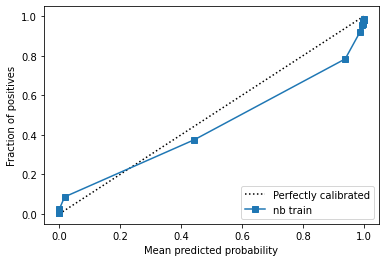

In [23]:
CalibrationDisplay.from_estimator(nb, X_train, y_train, n_bins = 20, strategy = "quantile", name = "nb train")

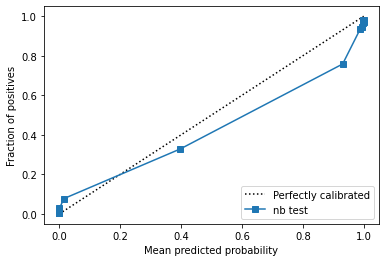

In [25]:
CalibrationDisplay.from_estimator(nb, X_test, y_test, n_bins = 20, strategy = "quantile", name = "nb test")

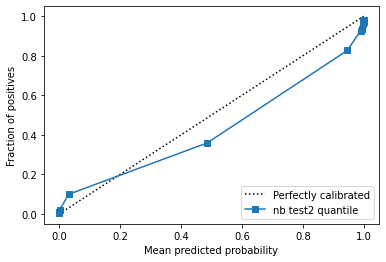

In [26]:
CalibrationDisplay.from_estimator(nb, X_test2, y_test2, n_bins = 20, strategy = "quantile", name = "nb test2 quantile")

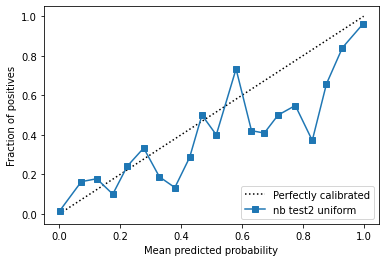

In [27]:
CalibrationDisplay.from_estimator(nb, X_test2, y_test2, n_bins = 20, strategy = "uniform", name = "nb test2 uniform")

#### UNCALIBRATED TREE PLOTS ON DIFFERENT VALIDATION / TEST DATA.

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf = RandomForestClassifier(random_state = 2021)

In [69]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=2021)

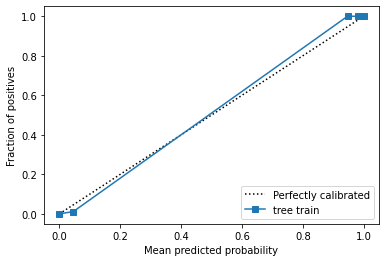

In [70]:
CalibrationDisplay.from_estimator(rf, X_train, y_train, n_bins = 20, strategy = "quantile", name = "tree train")

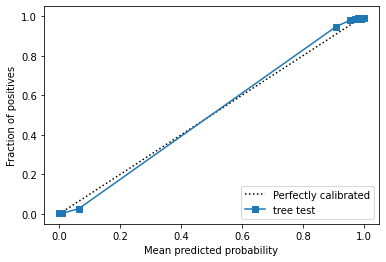

In [71]:
CalibrationDisplay.from_estimator(rf, X_test, y_test, n_bins = 20, strategy = "quantile", name = "tree test")

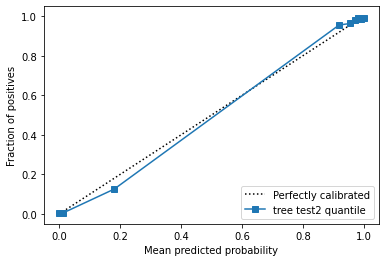

In [73]:
CalibrationDisplay.from_estimator(rf, X_test2, y_test2, n_bins = 20, strategy = "quantile", name = "tree test2 quantile")

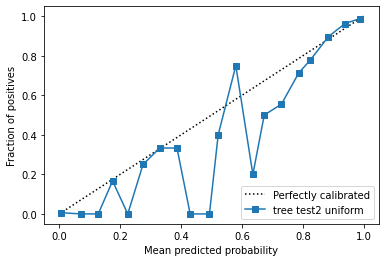

In [74]:
CalibrationDisplay.from_estimator(rf, X_test2, y_test2, n_bins = 20, strategy = "uniform", name = "tree test2 uniform")

## USING PREDICTIONS TO DISPLAY RELIABILITY DIAGRAMS :  BEST WAY TO PLOT !!

In [75]:
y_probs = logreg.predict_proba(X_test)[:,1]

In [76]:
y_probs

array([5.29594987e-05, 4.77805224e-05, 9.94334150e-01, ...,
       7.28952601e-04, 9.65997710e-01, 9.36578016e-01])

In [77]:
y_probs.shape, y_test.shape

((25000,), (25000,))

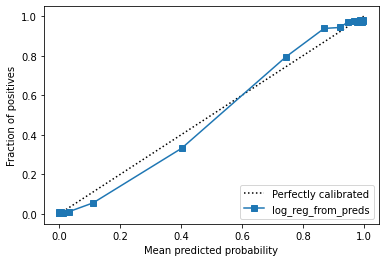

In [78]:
CalibrationDisplay.from_predictions(y_test, y_probs, n_bins = 20, strategy = "quantile", name = "log_reg_from_preds")

In [79]:
y_probs_test2 = logreg.predict_proba(X_test2)[:,1]

In [80]:
y_test2.shape, y_probs_test2.shape

((6250,), (6250,))

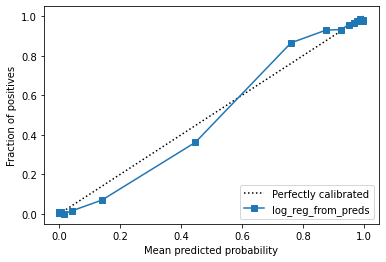

In [81]:
CalibrationDisplay.from_predictions(y_test2, y_probs_test2, n_bins = 20, strategy = "quantile", name = "log_reg_from_preds")

### CALIBRATION HOW TO ? 

In [151]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 60000, random_state = 2021)

X_train, X_valid, X_test = X[:20000], X[20000:40000], X[40000:]
y_train, y_valid, y_test = y[:20000], y[20000:40000], y[40000:]

In [152]:
X_train.shape, X_valid.shape, X_test.shape

((20000, 20), (20000, 20), (20000, 20))

In [153]:
y_train.shape, y_valid.shape, y_test.shape

((20000,), (20000,), (20000,))

**First of all, we will need to fit a classifier. Let’s use logistic regression (but any model that has a «predict_proba» 
                                                                           method would be ok).**

In [162]:
logreg = LogisticRegression(random_state = 2021)

In [163]:
logreg

LogisticRegression(random_state=2021)

In [164]:
logreg.fit(X_train, y_train)

LogisticRegression(random_state=2021)

**Then, we will use the output of the classifier (on validation data) to fit the calibrator and finally 
predicting probabilities on test data.**

In [165]:
probs_valid = logreg.predict_proba(X_valid)[:,1]

In [166]:
len(probs_valid)

20000

#### ISOTONIC REGRESSOR AS CALIBRATOR

In [167]:
from sklearn.isotonic import IsotonicRegression

In [168]:
iso = IsotonicRegression(y_min = 0, y_max = 1, out_of_bounds = "clip")

In [169]:
iso.fit(probs_valid, y_valid)

IsotonicRegression(out_of_bounds='clip', y_max=1, y_min=0)

In [170]:
logreg_pred_probas = logreg.predict_proba(X_test)[:,1]

In [171]:
len(logreg_pred_probas)

20000

In [173]:
iso.predict(logreg.predict_proba(X_test)[:,1])

array([0.95469256, 0.00455373, 0.97568882, ..., 0.34545455, 0.9917718 ,
       0.95551895])

In [174]:
iso_pred_probas = iso.predict(logreg.predict_proba(X_test)[:,1])

In [175]:
len(iso_pred_probas)

20000

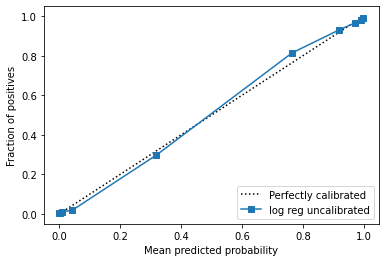

In [176]:
CalibrationDisplay.from_predictions(y_test,logreg_pred_probas,n_bins = 10, strategy = "quantile", name = "log reg uncalibrated")

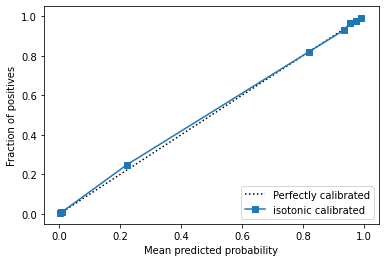

In [177]:
CalibrationDisplay.from_predictions(y_test, iso_pred_probas, n_bins = 10, strategy = "quantile", name = "isotonic calibrated")

#### LOGISTIC REGRESSION AS CALIBRATOR

In [178]:
logreg1 = LogisticRegression(random_state = 2021)

In [179]:
logreg2 = LogisticRegression(random_state = 2000)

In [180]:
logreg1.fit(X_train, y_train)

LogisticRegression(random_state=2021)

In [181]:
probs_validation = logreg1.predict_proba(X_valid)[:,1]

In [182]:
len(probs_validation), len(y_valid)

(20000, 20000)

In [183]:
logreg2.fit(probs_validation.reshape(-1,1), y_valid)

LogisticRegression(random_state=2000)

In [184]:
logreg_pred_probas = logreg1.predict_proba(X_test)[:,1]

In [185]:
calibrated_logreg_probs_test = logreg2.predict_proba(logreg_pred_probas.reshape(-1,1))[:,1]

In [188]:
len(logreg_pred_probas), len(calibrated_logreg_probs_test)

(20000, 20000)

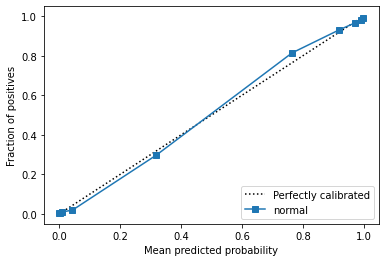

In [189]:
CalibrationDisplay.from_predictions(y_test, logreg_pred_probas, n_bins = 10, strategy = "quantile", name = "normal")

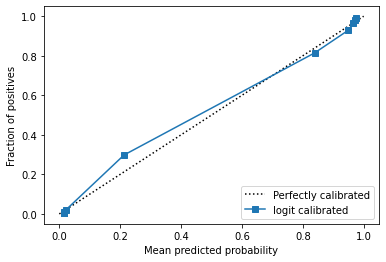

In [190]:
CalibrationDisplay.from_predictions(y_test, calibrated_logreg_probs_test,
                                    n_bins = 10,strategy = "quantile",name = "logit calibrated")

**At this point we have three options for predicting probabilities:**

**plain logistic regression,**

**logistic regression + isotonic regression,**

**logistic regression + logistic regression.**

**But how do we assess which one is the most calibrated?**

**Everybody likes plots. But besides the calibration plot, we need a quantitative way to measure (mis)calibration.
The most commonly used metric is called Expected Calibration Error. It answers the question:
How far away is our predicted probability from the true probability, on average?**

**Here is a Python implementation of the expected calibration error, which employs the Freedman-Diaconis rule as default:**

In [218]:
def expected_calibration_error(y, proba, bins = 'fd'):
  
    bin_count, bin_edges = np.histogram(proba, bins = bins)
    n_bins = len(bin_count)
    bin_edges[0] -= 1e-8 # because left edge is not included
    bin_id = np.digitize(proba, bin_edges, right = True) - 1
    bin_ysum = np.bincount(bin_id, weights = y, minlength = n_bins)
    bin_probasum = np.bincount(bin_id, weights = proba, minlength = n_bins)
    bin_ymean = np.divide(bin_ysum, bin_count, out = np.zeros(n_bins), where = bin_count > 0)
    bin_probamean = np.divide(bin_probasum, bin_count, out = np.zeros(n_bins), where = bin_count > 0)
    ece = np.abs((bin_probamean - bin_ymean) * bin_count).sum() / len(proba)
    
    return ece

**Now that we have a metric for calibration, 
let’s compare the calibration of the three models that we have obtained above (on test set):**

In [192]:
expected_calibration_error(y_test, logreg_pred_probas)

0.015063990760728908

In [194]:
expected_calibration_error(y_test, calibrated_logreg_probs_test) ## calibrated with logistic regression.

0.009986994940220562

In [193]:
expected_calibration_error(y_test, iso_pred_probas)  ## isotonic regression calibration.

0.005499047653219925

**In this case, isotonic regression provided the best outcome in terms of calibration.**

**We can see that while normal logistic regression give us 0.015 calibration error, isotonic regression has 0.005 which is 
3 times better. Even calibrating with the help of another logistic regression model increases performance almost 2 times which shows
the importance of calibration in order to have predicted probabilities better represent the true probabilities. When data
increases isotonic regression is adviced for calibration.**

### CALIBRATEDCLASSIFIERCV --- SCIKIT LEARN API

In [265]:
from sklearn.calibration import CalibratedClassifierCV

In [294]:
logreg = LogisticRegression(random_state = 2021)

In [267]:
calib_clf = CalibratedClassifierCV(base_estimator = logreg, method = "isotonic", cv = 5)

In [268]:
calib_clf.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=LogisticRegression(random_state=2021),
                       cv=5, method='isotonic')

In [269]:
calib_clf.calibrated_classifiers_

In [270]:
calib_clf.classes_

array([0, 1])

In [271]:
calib_preds_test = calib_clf.predict_proba(X_test)[:,1]

In [272]:
len(X_test), len(calib_preds_test)

(20000, 20000)

### COMPARISON BETWEEN RAW PREDICTIONS VS CALIBRATED PREDICTIONS !! 

### 1. BOTH TRAINED ON X_TRAIN AND Y_TRAIN

In [273]:
logreg

LogisticRegression(random_state=2021)

In [227]:
logreg.fit(X_train, y_train)

LogisticRegression(random_state=2021)

In [228]:
logreg_preds_raw = logreg.predict_proba(X_test)[:,1]

In [322]:
calib_clf = CalibratedClassifierCV(base_estimator = logreg, method = "isotonic", cv = 5)

In [323]:
calib_clf.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=LogisticRegression(random_state=2021),
                       cv=5, method='isotonic')

In [324]:
calib_preds = calib_clf.predict_proba(X_test)[:,1]

In [325]:
len(logreg_preds_raw), len(calib_preds)

(20000, 20000)

In [326]:
expected_calibration_error(y_test, logreg_preds_raw)

0.015063990760728908

In [327]:
expected_calibration_error(y_test, calib_preds)

0.004793461750652119

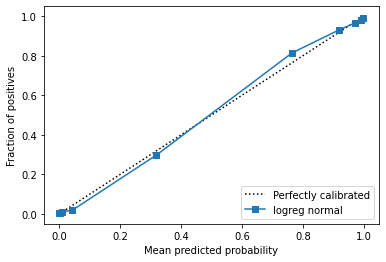

In [328]:
CalibrationDisplay.from_predictions(y_test, logreg_preds_raw,  n_bins = 10, strategy = "quantile", name = "logreg normal")

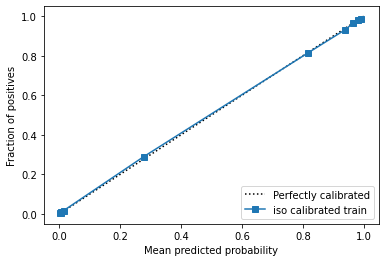

In [329]:
CalibrationDisplay.from_predictions(y_test, calib_preds,  n_bins = 10, strategy = "quantile", name = "iso calibrated train")

#### 2. LOG REG TRAINED ON X_TRAIN, Y_TRAIN ---- CALIBRATEDCLASSIFIERCV TRAINED ON X_VALID, Y_VALID

**Expected calibration error increased slightly since calibrator trained on validation data // not train data.**

**cv = "prefit"**

In [330]:
logreg

LogisticRegression(random_state=2021)

In [331]:
logreg.fit(X_train, y_train)

LogisticRegression(random_state=2021)

In [332]:
logreg_preds_raw = logreg.predict_proba(X_test)[:,1]

In [333]:
calib_clf = CalibratedClassifierCV(base_estimator = logreg, method = "isotonic", cv = "prefit")

In [334]:
calib_clf.fit(X_valid, y_valid)

CalibratedClassifierCV(base_estimator=LogisticRegression(random_state=2021),
                       cv='prefit', method='isotonic')

In [335]:
calib_preds = calib_clf.predict_proba(X_test)[:,1]

In [336]:
len(logreg_preds_raw), len(calib_preds)

(20000, 20000)

In [337]:
expected_calibration_error(y_test, logreg_preds_raw)

0.015063990760728908

In [338]:
expected_calibration_error(y_test, calib_preds)

0.0054990454801602875

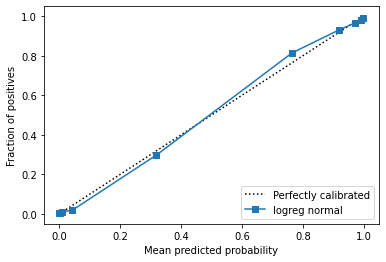

In [339]:
CalibrationDisplay.from_predictions(y_test, logreg_preds_raw,  n_bins = 10, strategy = "quantile", name = "logreg normal")

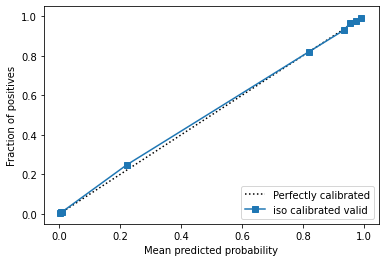

In [340]:
CalibrationDisplay.from_predictions(y_test, calib_preds,  n_bins = 10, strategy = "quantile", name = "iso calibrated valid")